In [1]:
import pandas as pd
import datetime
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
#import seaborn as sns

# disable scientific notation and set decimal places
pd.options.display.float_format = '{:.4f}'.format

# disaply column and row to the maximum length
pd.set_option('display.max_colwidth', None, 'display.max_rows', None, 'display.max_columns', None)

## Set Parameters

In [2]:
maturity_condition = 'days_to_maturity < 500'

selected_maturity = datetime(2024, 3, 26).strftime('%Y-%m-%d') # Only used for term structure comparison

## Get OKX Data

In [3]:
import okx.PublicData as PublicData
flag = "0"  # Production trading: 0, Demo trading: 1
publicDataAPI = PublicData.PublicAPI(flag=flag)

# Get option market data
result = publicDataAPI.get_opt_summary(
    uly="BTC-USD",
)

data = pd.DataFrame(result['data'])
data['ts'] = pd.to_datetime(data['ts'], unit = 'ms')

index = ['instId', 
         'askVol', 
         'bidVol', 
         'markVol',
         'volLv', # Implied volatility of ATM options
         'fwdPx',
         'delta', 
         'deltaBS',
         'gamma',
         'gammaBS',
         'theta',
         'thetaBS',
         'vega',
         'vegaBS']

data = data[index]
data.iloc[:,1:] = data.iloc[:,1:].astype(float)


# Get the last spot price
import okx.MarketData as MarketData
marketDataAPI =  MarketData.MarketAPI(flag=flag)

result2 = marketDataAPI.get_history_trades(
    instId="BTC-USDT"
)

markpx_spot = pd.DataFrame(result2['data'])
markpx_spot['px'] = markpx_spot['px'].astype(float)
markpx_spot = markpx_spot.loc[0]['px']



# Get option mark price
result3 = publicDataAPI.get_mark_price(
    instType="OPTION",
)

markpx = pd.DataFrame(result3['data'])
markpx['markPx'] = markpx['markPx'].astype(float)
instId_to_markPx = dict(zip(markpx['instId'], markpx['markPx']))
data['markPx'] = data['instId'].map(instId_to_markPx)

header:  {'Content-Type': 'application/json', 'x-simulated-trading': '0'}
domain: https://www.okx.com
url: /api/v5/public/opt-summary?uly=BTC-USD
header:  {'Content-Type': 'application/json', 'x-simulated-trading': '0'}
domain: https://www.okx.com
url: /api/v5/market/history-trades?instId=BTC-USDT
header:  {'Content-Type': 'application/json', 'x-simulated-trading': '0'}
domain: https://www.okx.com
url: /api/v5/public/mark-price?instType=OPTION


/tmp/ipykernel_37108/1156371634.py:11: FutureWarning: The behavior of 'to_datetime' with 'unit' when parsing strings is deprecated. In a future version, strings will be parsed as datetime strings, matching the behavior without a 'unit'. To retain the old behavior, explicitly cast ints or floats to numeric type before calling to_datetime.
  data['ts'] = pd.to_datetime(data['ts'], unit = 'ms')


In [4]:
import okx.PublicData as PublicData
flag = "0"  # Production trading: 0, Demo trading: 1
publicDataAPI = PublicData.PublicAPI(flag=flag)

# Get option market data
result = publicDataAPI.get_opt_summary(
    uly="BTC-USD",
)

data = pd.DataFrame(result['data'])
data['ts'] = pd.to_datetime(data['ts'], unit = 'ms')
data.head(10)

header:  {'Content-Type': 'application/json', 'x-simulated-trading': '0'}
domain: https://www.okx.com
url: /api/v5/public/opt-summary?uly=BTC-USD


/tmp/ipykernel_37108/2583484061.py:11: FutureWarning: The behavior of 'to_datetime' with 'unit' when parsing strings is deprecated. In a future version, strings will be parsed as datetime strings, matching the behavior without a 'unit'. To retain the old behavior, explicitly cast ints or floats to numeric type before calling to_datetime.
  data['ts'] = pd.to_datetime(data['ts'], unit = 'ms')


,askVol,bidVol,delta,deltaBS,fwdPx,gamma,gammaBS,instId,instType,lever,markVol,realVol,theta,thetaBS,ts,uly,vega,vegaBS,volLv
0,2.0800839648437504,0,0.4878017833515569,0.998280171851745,65358.184880304089656,-0.9546445439794613,0.0000003210290367707591,BTC-USD-240628-32000-C,OPTION,1.958946788987584,1.6162760992803296,0,-0.00007108323379152523,-8.446558453167688,2024-06-19 07:35:25.440,BTC-USD,0.000008368401660706728,0.5463478392225602,0.4737321375475064
1,1.8164126171875,0,-0.0017799911264972646,-0.0016505926777682363,65358.184880304089656,0.024519004976647087,0.0000003210290367707591,BTC-USD-240628-32000-P,OPTION,7728.067915974097,1.6162760992803296,0,-0.00007500211533087029,-4.882775912585431,2024-06-19 07:35:25.440,BTC-USD,0.000008368401660706728,0.5463478392225602,0.4737321375475064
2,0,0,0.00000000000000000000000000013483112839703503,0.00000000000000000000000000013492200778487356,65307.7,0.0000000000000000000000004940818693548844,0.000000000000000000000000000007578135156251112,BTC-USD-240619-71000-C,OPTION,10000,1.1079787639327618,0,-0.000000000000000000000000000013914998821044798,-0.0000000000000000000000009466642407238307,2024-06-19 07:35:25.440,BTC-USD,0.0000000000000000000000000000002511780799010974,0.000000000000000000000000016398663302502944,0.3326538593399595
3,5,0,-0.4357415653918506,-0.40137814941921646,65307.7,2.1712261435396396,0.000000000000000000000000000007578135156251112,BTC-USD-240619-71000-P,OPTION,11.680396781652284,1.1079787639327618,0,0.000000039228675423522845,123.4418576598483,2024-06-19 07:35:25.440,BTC-USD,0.0000000000000000000000000000002511780799010974,0.000000000000000000000000016398663302502944,0.3326538593399595
4,0,0,0.00000000005265835380422495,0.00000000005271664047355926,65307.7,0.00000011579744304173675,0.0000000000017776866859670964,BTC-USD-240619-68500-C,OPTION,10000,1.0817312865383069,0,-0.0000000000031113720744830132,-0.0000002180495002559687,2024-06-19 07:35:25.440,BTC-USD,0.00000000000005752578629724001,0.000000003755686009987909,0.3326538593399595
5,5,0,-0.420398552473282,-0.40137814936649985,65307.7,2.0947746345645597,0.0000000000017776866859670964,BTC-USD-240619-68500-P,OPTION,21.102514551345916,1.0817312865383069,0,0.000000021710248571315286,119.09425981597043,2024-06-19 07:35:25.440,BTC-USD,0.00000000000005752578629724001,0.000000003755686009987909,0.3326538593399595
6,0.5969326342773438,0.5166715643310547,0.5921817160834273,0.8435614169259235,66998.475267484786002,-0.36846396221769706,0.00001249711994653082,BTC-USD-240927-52000-C,OPTION,3.9780459466238187,0.5608140116352274,0,-0.0003510101473695903,-32.90477951237893,2024-06-19 07:35:25.440,BTC-USD,0.0012538202217495724,81.85816081736434,0.5658000631760525
7,0.5639737158203124,0.5560391613769531,-0.1838265135455602,-0.15623527845077453,66998.475267484786002,1.1835524970402782,0.00001249711994653082,BTC-USD-240927-52000-P,OPTION,36.24339383737782,0.5608140116352274,0,-0.00035146508983055665,-19.845483679318484,2024-06-19 07:35:25.440,BTC-USD,0.0012538202217495724,81.85816081736434,0.5658000631760525
8,0.9423909277343749,0,0.9274245989586221,0.9930671377801449,65281.23804033534228,-1.1599174231129628,0.000010644259573947052,BTC-USD-240620-61000-C,OPTION,15.234023819811833,0.5249359111003704,0,-0.000260521857976905,-11.752577694022095,2024-06-19 07:35:25.440,BTC-USD,0.000010161525093150296,0.6634154887565032,0.4368384354548959
9,0.6445399609375,0,-0.006967925927374468,-0.0069050071410469635,65281.23804033534228,0.7088676266590304,0.000010644259573947052,BTC-USD-240620-61000-P,OPTION,10000,0.5249359111003704,0,-0.0002623185598777105,-17.16548204255582,2024-06-19 07:35:25.440,BTC-USD,0.000010161525093150296,0.6634154887565032,0.4368384354548959


## Organise Data

In [5]:
strike = []
for index, i in enumerate(data['instId']):
    i = float(i.split('-')[3])
    strike.append(i)
data["strikePx"] = strike


maturity = []
for index, i in enumerate(data['instId']):
    i = i.split('-')[2]
    i = datetime.strptime(i, '%y%m%d').date()
    i = pd.to_datetime(i, unit ='ns')
    maturity.append(i)
data["maturity"] = maturity


days_to_maturity = []
for index, i in enumerate(data['maturity']):
    i = (i - datetime.today()).days
    days_to_maturity.append(i)
data["days_to_maturity"] = days_to_maturity

# Moneyness, using forward price
data['moneyness'] = data['strikePx'].astype(float)/ data['fwdPx'].astype(float)

#log Moneyness, making extreme values less extreme
#data['moneyness'] = np.log(data['strikePx'].astype(float)/ data['fwdPx'].astype(float)) 

# Moneyness using the current spot price
#data['moneyness'] = data['strikePx'].astype(float)/ markpx_spot 


data.loc[data['instId'].str.contains('-P'), 'moneyness'] = data.loc[data['instId'].str.contains('-P'), 'moneyness'] * -1

data = data.sort_values(['days_to_maturity','strikePx']).query('days_to_maturity>0')

In [6]:
data = data.query(maturity_condition)

all_calls = data[data['instId'].str.contains('-C')].sort_values(['days_to_maturity', 'strikePx']).query('days_to_maturity > 0')
all_puts = data[data['instId'].str.contains('-P')].sort_values(['days_to_maturity', 'strikePx']).query('days_to_maturity > 0')

In [7]:
data.head(10)

,askVol,bidVol,delta,deltaBS,fwdPx,gamma,gammaBS,instId,instType,lever,markVol,realVol,theta,thetaBS,ts,uly,vega,vegaBS,volLv,strikePx,maturity,days_to_maturity,moneyness
82,1.245124697265625,0,0.8514715782490201,0.9938668256502698,65289.43046333941714,-1.4235300078624782,0.000004279767007759005,BTC-USD-240621-56000-C,OPTION,7.02270629287325,0.834733580038383,0,-0.00026669799119425724,-18.100293242140683,2024-06-19 07:35:25.440,BTC-USD,0.00001288689951047083,0.8413470083401091,0.4618098314507108,56000.0000,2024-06-21,1,0.8577
83,0.9765705468749999,0.820320859375,-0.006258161256618155,-0.006133174349730153,65289.43046333941714,0.29192947114879836,0.000004279767007759005,BTC-USD-240621-56000-P,OPTION,8000.838046950631,0.834733580038383,0,-0.00026669799119425724,-17.406852272325253,2024-06-19 07:35:25.440,BTC-USD,0.00001288689951047083,0.8413470083401091,0.4618098314507108,56000.0000,2024-06-21,1,-0.8577
80,1.0815508056640621,0,0.8781501234633367,0.989965170366073,65289.43046333941714,-1.2370384509300187,0.000007953525142779644,BTC-USD-240621-58000-C,OPTION,8.943340164851532,0.6926069242575892,0,-0.000341222110454421,-22.98731797734736,2024-06-19 07:35:25.440,BTC-USD,0.0000198713291915797,1.2973394689306639,0.4618098314507108,58000.0000,2024-06-21,1,0.8884
81,0.742196015625,0,-0.01021282102464591,-0.01003482963392699,65289.43046333941714,0.5396874380459463,0.000007953525142779644,BTC-USD-240621-58000-P,OPTION,5618.24926453382,0.6926069242575892,0,-0.000341222110454421,-22.26911125860995,2024-06-19 07:35:25.440,BTC-USD,0.0000198713291915797,1.2973394689306639,0.4618098314507108,58000.0000,2024-06-21,1,-0.8884
89,0.8886800976562499,0,0.894937079874164,0.9763290090101502,65289.43046333941714,-0.49347012509353444,0.00001985700115880333,BTC-USD-240621-60000-C,OPTION,12.286230472916337,0.5793097934052991,0,-0.0005959903808525894,-39.63394564496847,2024-06-19 07:35:25.440,BTC-USD,0.00004149587839203119,2.70914141258054,0.4618098314507108,60000.0000,2024-06-21,1,0.9190
91,0.62500875,0.6054775390625,-0.024059069596162663,-0.023670990989849816,65289.43046333941714,1.3445221738471191,0.00001985700115880333,BTC-USD-240621-60000-P,OPTION,2576.7975449637124,0.5793097934052991,0,-0.0005959903808525894,-38.89097317730908,2024-06-19 07:35:25.440,BTC-USD,0.00004149587839203119,2.70914141258054,0.4618098314507108,60000.0000,2024-06-21,1,-0.9190
85,0.742196015625,0,0.8914267969594175,0.9578079728828062,65289.43046333941714,0.4763849402175902,0.000034604722749344046,BTC-USD-240621-61000-C,OPTION,15.064511679547715,0.535828267700332,0,-0.000888567582126969,-58.73259545803256,2024-06-19 07:35:25.440,BTC-USD,0.00006688695507991696,4.366848636302539,0.4618098314507108,61000.0000,2024-06-21,1,0.9343
87,0.551766708984375,0.5371183007812499,-0.042885955002081436,-0.04219202711719383,65289.43046333941714,2.3450104441405877,0.000034604722749344046,BTC-USD-240621-61000-P,OPTION,1441.0719352515569,0.535828267700332,0,-0.000888567582126969,-57.97724011591219,2024-06-19 07:35:25.440,BTC-USD,0.00006688695507991696,4.366848636302539,0.4618098314507108,61000.0000,2024-06-21,1,-0.9343
96,0.6909265869140625,0,0.8680558369323037,0.9198040134091805,65289.43046333941714,2.255459398313351,0.00006113883425763106,BTC-USD-240621-62000-C,OPTION,19.32435243291792,0.501989828312,0,-0.0013778782238465285,-90.65932481625516,2024-06-19 07:35:25.440,BTC-USD,0.00011071144051712598,7.228017817041604,0.4618098314507108,62000.0000,2024-06-21,1,0.9496
97,0.5029386816406249,0.493173076171875,-0.08157351752036733,-0.0801959865908195,65289.43046333941714,4.154718107218693,0.00006113883425763106,BTC-USD-240621-62000-P,OPTION,725.9365133298655,0.501989828312,0,-0.0013778782238465285,-89.89158659967381,2024-06-19 07:35:25.440,BTC-USD,0.00011071144051712598,7.228017817041604,0.4618098314507108,62000.0000,2024-06-21,1,-0.9496


## Interpolate IV Surface

In [9]:
from pandas import json_normalize
from scipy import interpolate
import statsmodels.api as sm
from mpl_toolkits import mplot3d
from matplotlib.ticker import FuncFormatter
from mpl_toolkits.mplot3d import Axes3D


In [10]:


#%matplotlib notebook 

def plot_iv_surf(x,y,z,x2=None,y2=None,z2=None,label=''):
    fig = plt.figure(3, figsize=(6,6))
    ax=plt.axes(projection='3d')
    ax.set_title('BTC Implied Volatility Surface, OKX')
    ax.set_zlabel('Implied Volatility')
    plt.xlabel('Strike / Fwdpx')
    plt.ylabel('Days To Maturity')
    #ax.zaxis.set_major_formatter(FuncFormatter(lambda z, _: '{:.0%}'.format(z)))
    if z2 is not None:
        ax.scatter3D(x2,y2,z2, c='r', s=100,label=label)
    ax.plot_surface(x, y, z, rstride=1, cstride=1,alpha=0.5)
    ax.legend()
    

# Interpolate implied volatility using a cubic spline
# Then plot the implied volatility surface

x = data['moneyness']
y = data['days_to_maturity']
z = data['markVol']

X,Y = np.meshgrid(np.linspace(.95,1.05,99),np.linspace(1,np.max(y),100))
Z = interpolate.griddata(np.array([x,y]).T,np.array(z),(X,Y), method='cubic')

xyz = pd.DataFrame({'x':x,'y':y,'z':z})
xyz = xyz.query('x>0.95 & x<1.05')
plot_iv_surf(X,Y,Z,xyz['x'],xyz['y'],xyz['z'],'Observed IV')

iv_df = pd.DataFrame(Z, index=np.linspace(10,np.max(y),100), columns=np.linspace(.95,1.05,99))

Error in callback <function _draw_all_if_interactive at 0x7b2abaec60c0> (for post_execute), with arguments args (),kwargs {}:


TypeError: can't multiply sequence by non-int of type 'float'

TypeError: can't multiply sequence by non-int of type 'float'

<Figure size 600x600 with 1 Axes>

### Just Ref, Non-Interpolated

In [9]:
#%matplotlib notebook 

a = data['moneyness']
b = data['days_to_maturity']
c = data['markVol']

plt.rcParams['figure.figsize'] = (13,6)

fig = plt.figure()
ax = plt.axes(projection = '3d')
ax.scatter3D(a, b, c, s = 100)

ax.set_xlabel('moneyness')
ax.set_ylabel('days to maturity')
ax.set_zlabel('implied volatility')

#ax.view_init(45,215);
plt.title('OKEX Implied Volatility Scatter Plot')

Text(0.5, 0.92, 'OKEX Implied Volatility Scatter Plot')

Error in callback <function _draw_all_if_interactive at 0x7fc95b1639a0> (for post_execute):


TypeError: can't multiply sequence by non-int of type 'float'

TypeError: can't multiply sequence by non-int of type 'float'

<Figure size 1300x600 with 1 Axes>

## Term Structure

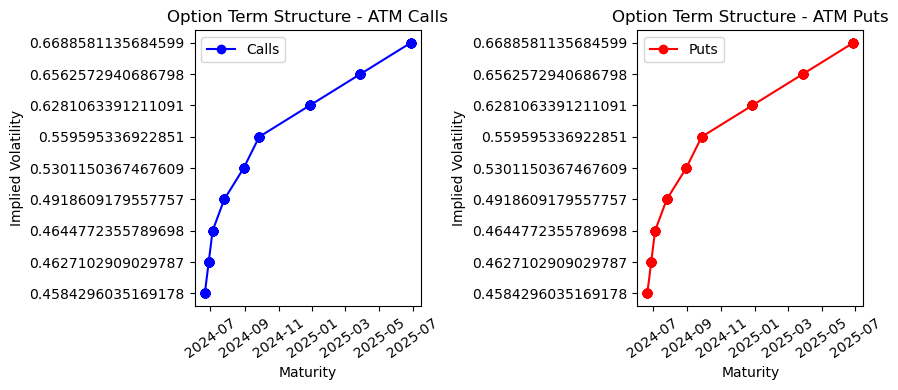

In [10]:
calls_1 = all_calls.set_index('maturity')
puts_1 = all_puts.set_index('maturity')

# Create subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(9, 4))

# Plot option term structure for calls
ax1.plot(calls_1['volLv'], label='Calls', marker='o', color='blue')
ax1.set_title('Option Term Structure - ATM Calls')
ax1.set_xlabel('Maturity')
ax1.set_ylabel('Implied Volatility')
ax1.legend()


# Plot option term structure for puts
ax2.plot(puts_1['volLv'], label='Puts', marker='o', color='red')
ax2.set_title('Option Term Structure - ATM Puts')
ax2.set_xlabel('Maturity')
ax2.set_ylabel('Implied Volatility')
ax2.legend()

ax1.tick_params(axis='x', labelrotation=35)
ax2.tick_params(axis='x', labelrotation=35)

# Adjust spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()


## Skew

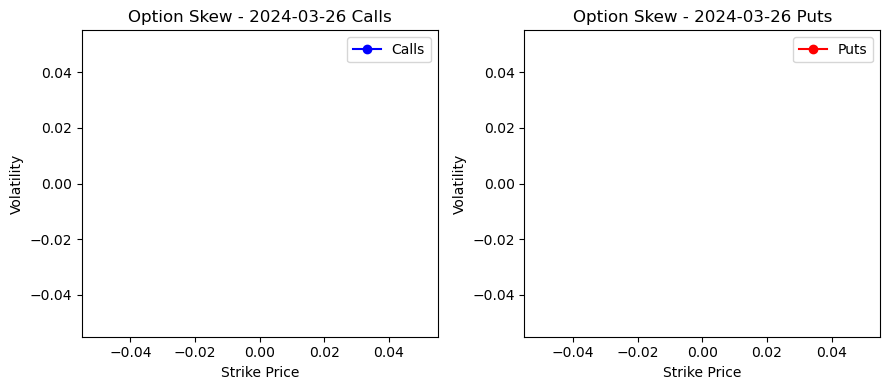

In [11]:
calls_match_dtm = all_calls[all_calls['maturity'] == selected_maturity].set_index('strikePx').sort_index()
puts_match_dtm = all_puts[all_puts['maturity'] == selected_maturity].set_index('strikePx').sort_index()

# Create subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(9, 4))

# Plot option skew for calls
ax1.plot(calls_match_dtm['markVol'], label='Calls', marker='o', color='blue')
ax1.set_title(f'Option Skew - {selected_maturity} Calls')
ax1.set_xlabel('Strike Price')
ax1.set_ylabel('Volatility')
ax1.legend()

# Plot option skew for puts
ax2.plot(puts_match_dtm['markVol'], label='Puts', marker='o', color='red')
ax2.set_title(f'Option Skew - {selected_maturity} Puts')
ax2.set_xlabel('Strike Price')
ax2.set_ylabel('Volatility')
ax2.legend()

# Adjust spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()


In [12]:
#cp OKX_VolSurf.ipynb ~/Desktop/